In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
warnings.filterwarnings("ignore")

In [2]:
alpha = pd.read_csv("alpha.csv")
beta = pd.read_csv("beta.csv")
charlie = pd.read_csv("charlie.csv")

alpha = alpha.sample(frac=1).reset_index(drop=True)
beta = beta.sample(frac=1).reset_index(drop=True)
charlie = charlie.sample(frac=1).reset_index(drop=True)


data = alpha.copy()#.append(beta).append(charlie).reset_index(drop=True)

In [3]:
data = data.drop(columns=["created_at","MG811_Digital","MQ7_Digital"])

# Drop rows where the value of 'column_name' is 0
#data = data.loc[data['CO'] != 0]


In [4]:
data.head()

,Temperature,Humidity,MQ7_analog,MQ9_analog,MG811_analog,MQ135_analog,CO2,CO
0,31.83,66.77,4984.0,3015.0,4776.0,2920.0,600.0,0.0
1,31.79,67.10,4605.0,2911.0,4789.0,2904.0,601.0,0.0
2,33.09,58.64,3341.0,2108.0,5624.0,3229.0,615.0,0.0
3,32.18,61.56,3251.0,1572.0,2958.0,1452.0,609.0,0.0
4,28.47,73.81,4852.0,2646.0,5853.0,2638.0,601.0,0.0


In [5]:
target = data.CO2
data = data.drop(["CO2", "CO"], axis = 1)

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)


# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

# Create a list to store the metrics for each model
metrics_data = []

# Model 1 (Random Forest)

# Step 2: Build the Random Forest regression model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = rf_model.predict(X_test)

y_true_rf = y_test  # Replace with the true target values for the Random Forest model
y_pred_rf = y_pred  # Replace with the predicted target values for the Random Forest model
mse_rf, rmse_rf, mae_rf, r2_rf = calculate_metrics(y_true_rf, y_pred_rf)
metrics_data.append(['Mine (Random Forest)', mse_rf, rmse_rf, mae_rf, r2_rf])

# Model 2 (Manual Tuning)

X_test["MQ7_analog"] = X_test["MQ7_analog"]/5.126
X_test["MQ9_analog"] = X_test["MQ9_analog"]/2.16
X_test["MG811_analog"] = X_test["MG811_analog"]/8.3
X_test["MQ135_analog"] = X_test["MQ135_analog"]/4

y_pred = X_test[["MQ7_analog","MQ9_analog","MG811_analog","MQ135_analog"]].mean(axis=1)

y_true_manual = y_test  # Replace with the true target values for the LightGBM model
y_pred_manual = y_pred  # Replace with the predicted target values for the LightGBM model

mse_manual, rmse_manual, mae_manual, r2_manual = calculate_metrics(y_true_manual, y_pred_manual)
metrics_data.append(['Manual Tuning', mse_manual, rmse_manual, mae_manual, r2_manual])

# Model 3 (The Mean)
y_pred = [y_train.mean() for i in range(len(X_test))]
y_true_mean = y_test  # Replace with the true target values for the mean model
y_pred_mean = y_pred  # Replace with the predicted target values for the mean model
mse_mean, rmse_mean, mae_mean, r2_mean = calculate_metrics(y_true_mean, y_pred_mean)
metrics_data.append(['Average value', mse_mean, rmse_mean, mae_mean, r2_mean])

# Create a DataFrame to store the metrics
columns = ['Model', 'MSE', 'RMSE', 'MAE', 'R2']
metrics_df = pd.DataFrame(metrics_data, columns=columns)

# Display the DataFrame
print(metrics_df)


                  Model           MSE        RMSE         MAE          R2
0  Mine (Random Forest)     18.849755    4.341630    2.476696    0.916838
1         Manual Tuning  52106.319603  228.268087  155.691170 -228.884241
2         Average value    226.949828   15.064854   12.037968   -0.001264


<Figure size 1440x864 with 0 Axes>

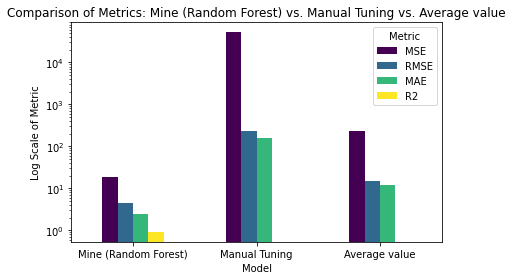

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the DataFrame 'metrics_df' as shown above

# Set the "Model" column as the index for easier plotting
metrics_df.set_index('Model', inplace=True)

# Create a grouped bar plot with log scale on the y-axis
plt.figure(figsize=(20, 12))
metrics_df.plot(kind='bar', logy=True, colormap='viridis', rot=0)
plt.xlabel('Model')
plt.ylabel('Log Scale of Metric')
plt.title('Comparison of Metrics: Mine (Random Forest) vs. Manual Tuning vs. Average value')
plt.legend(title='Metric', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig('Comparison of Metrics Mine vs Manual Tuning vs Average value.png', bbox_inches='tight')
plt.show()
